In [58]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Import the time library and the datetime module from the datetime library
import time
from datetime import datetime
#Import the requests library
import requests
#Import the API key.
from config import weather_api_key

In [59]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [60]:
#Add the latitude and longitudes to a list.
coordinates = list(lat_lngs)

In [61]:
#Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-56.86211204651086 132.16026395726044
22.97010173439891 59.97957552890523
-72.58908047887692 73.03983774714925
24.333173243609792 53.63499284610853
24.084197537543204 -32.8003274832939
-10.042939993729036 -128.28719045116338
8.364954942430103 -122.62423611345473
-74.52678768097981 104.67521306443064
-12.947350568981037 164.8467917338793
-18.01460142180872 -14.893054734658818
38.2119071098177 48.225100493860566
72.27628558046234 -79.14427277394257
-42.96240331390395 11.555056742673287
68.77622229684053 -157.02099427269306
69.11531968007091 171.3010797043474
-23.127029916784224 37.288981876330865
-22.610511885994114 -75.9981982407903
80.2278752678468 -165.73177075890595
28.516049034149148 -80.06691493442773
-84.79214316768142 26.63930819520573
-2.405124325954503 70.27260560581036
-53.8050607193665 -82.79547300056828
-35.292967645851476 27.103052213202346
44.959623842239154 63.33878954819798
25.531510773684275 -123.56284863822557
-6.766405954817728 148.2764042253266
23.477332440333754 1.0

-15.375157196775717 -86.29542309035682
53.546902846330255 -107.1621591347318
-56.41057938123076 -127.2576830955034
35.98101125329099 -143.88249599843132
-64.09560517463197 44.48783545236694
68.80035662453304 147.82118892647446
22.740658289936334 -103.06334877148058
73.27670482244221 -175.00744350658832
-5.362470796466965 179.38568498832126
43.344632685992565 59.89776958834548
-2.83441472295614 -97.7259887897086
74.00063546541318 88.41853570474933
16.065102473897113 -164.45570895261073
-66.36077713343755 -93.53204382999448
8.093602230033866 -159.38725319862104
-87.85840688119407 -105.49355706917025
60.19335223141954 101.22850534521035
-69.45968449415858 15.09067804522445
34.19469357400544 136.0917227858721
33.85515053196971 25.148901150943118
22.932091719562663 14.333891979847806
-4.247612181492457 -114.19202485795063
64.61681263642038 102.70763046686261
-57.23895303208311 -82.05915313701668
61.54484392211205 165.3986312184589
5.847256341456671 -176.84746423925077
-36.28660680111287 31.

In [62]:
from citipy import citipy

In [63]:
#Create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

615

In [64]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [65]:
#Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print('Beginning Data Retrieval        ')
print('--------------------------------')
#Create counters
record_count = 1
set_count = 1
#Loop through all the cities in our list.
for i, city in enumerate(cities):
    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    #Create endpoint URL with each city.
    city_url = url + '&q=' + cities[i]
    #Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    #Add 1 to the record count.
    record_count += 1
#Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the data to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list.
        city_data.append({'City': city.title(),
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})
        #If an error is experienced, skip the city.
    except:
        print('City not found. Skipping...')
        pass
#Indicate that Data Loading is complete.
print('-----------------------------')
print('Data Retrieval Complete      ')
print('-----------------------------')

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | sur
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | abu dhabi
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | lata
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | ardabil
Processing Record 12 of Set 1 | clyde river
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | pevek
Processing Record 16 of Set 1 | inhambane
Processing Record 17 of Set 1 | antofagasta
Processing Record 18 of Set 1 | cape canaveral
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | port alfred
Processing Reco

Processing Record 34 of Set 4 | nabire
Processing Record 35 of Set 4 | pisco
Processing Record 36 of Set 4 | kirakira
Processing Record 37 of Set 4 | eyrarbakki
Processing Record 38 of Set 4 | airai
Processing Record 39 of Set 4 | hamilton
Processing Record 40 of Set 4 | bac lieu
Processing Record 41 of Set 4 | springbok
Processing Record 42 of Set 4 | taft
Processing Record 43 of Set 4 | stoyba
City not found. Skipping...
Processing Record 44 of Set 4 | vichy
Processing Record 45 of Set 4 | severo-kurilsk
Processing Record 46 of Set 4 | linxia
Processing Record 47 of Set 4 | turayf
Processing Record 48 of Set 4 | zachagansk
City not found. Skipping...
Processing Record 49 of Set 4 | port-gentil
Processing Record 50 of Set 4 | sitka
Processing Record 1 of Set 5 | leningradskiy
Processing Record 2 of Set 5 | hasaki
Processing Record 3 of Set 5 | grand gaube
Processing Record 4 of Set 5 | dikson
Processing Record 5 of Set 5 | porto novo
Processing Record 6 of Set 5 | pathein
Processing R

Processing Record 21 of Set 8 | bengkulu
Processing Record 22 of Set 8 | codrington
Processing Record 23 of Set 8 | finca blanco
Processing Record 24 of Set 8 | oktyabrskiy
Processing Record 25 of Set 8 | tuatapere
Processing Record 26 of Set 8 | emiliano zapata
Processing Record 27 of Set 8 | churumuco
City not found. Skipping...
Processing Record 28 of Set 8 | villazon
Processing Record 29 of Set 8 | chokurdakh
Processing Record 30 of Set 8 | mount gambier
Processing Record 31 of Set 8 | nisia floresta
Processing Record 32 of Set 8 | taltal
Processing Record 33 of Set 8 | ginir
Processing Record 34 of Set 8 | hohhot
Processing Record 35 of Set 8 | ueckermunde
Processing Record 36 of Set 8 | yanam
Processing Record 37 of Set 8 | luanda
Processing Record 38 of Set 8 | areosa
Processing Record 39 of Set 8 | suntar
Processing Record 40 of Set 8 | tolbazy
Processing Record 41 of Set 8 | beringovskiy
Processing Record 42 of Set 8 | rafraf
Processing Record 43 of Set 8 | purranque
Processin

Processing Record 12 of Set 12 | qaqortoq
Processing Record 13 of Set 12 | jiwani
Processing Record 14 of Set 12 | shafranovo
Processing Record 15 of Set 12 | arrifes
Processing Record 16 of Set 12 | berlevag
Processing Record 17 of Set 12 | wilmington
Processing Record 18 of Set 12 | plettenberg bay
Processing Record 19 of Set 12 | verkhnevilyuysk
Processing Record 20 of Set 12 | businga
Processing Record 21 of Set 12 | keighley
Processing Record 22 of Set 12 | flin flon
Processing Record 23 of Set 12 | luganville
Processing Record 24 of Set 12 | patiya
Processing Record 25 of Set 12 | jujuy
City not found. Skipping...
Processing Record 26 of Set 12 | severnyy
Processing Record 27 of Set 12 | souillac
Processing Record 28 of Set 12 | sterling
Processing Record 29 of Set 12 | kodinsk
Processing Record 30 of Set 12 | ilhabela
Processing Record 31 of Set 12 | the valley
Processing Record 32 of Set 12 | birao
Processing Record 33 of Set 12 | rio claro
Processing Record 34 of Set 12 | skeg

In [66]:
print(len(city_data))

561


In [67]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,53.92,87,8,3.51,AU,2022-05-26 12:58:34
1,Sur,22.5667,59.5289,96.35,39,0,7.96,OM,2022-05-26 12:58:34
2,Saint-Philippe,-21.3585,55.7679,78.39,75,47,2.84,RE,2022-05-26 12:58:35
3,Abu Dhabi,24.4667,54.3667,96.82,36,0,23.02,AE,2022-05-26 12:57:05
4,Ponta Do Sol,32.6667,-17.1000,72.01,77,66,3.67,PT,2022-05-26 12:58:35
5,Atuona,-9.8000,-139.0333,77.92,74,20,19.55,PF,2022-05-26 12:58:35
6,Cabo San Lucas,22.8909,-109.9124,69.51,84,0,9.08,MX,2022-05-26 12:55:00
7,Albany,42.6001,-73.9662,60.17,58,100,1.01,US,2022-05-26 12:56:04
8,Lata,40.1629,-8.3327,79.92,23,8,4.81,PT,2022-05-26 12:58:57
9,Jamestown,42.0970,-79.2353,65.71,82,100,5.01,US,2022-05-26 12:58:57


In [68]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng',
                    'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2022-05-26 12:58:34,-42.7826,147.0587,53.92,87,8,3.51
1,Sur,OM,2022-05-26 12:58:34,22.5667,59.5289,96.35,39,0,7.96
2,Saint-Philippe,RE,2022-05-26 12:58:35,-21.3585,55.7679,78.39,75,47,2.84
3,Abu Dhabi,AE,2022-05-26 12:57:05,24.4667,54.3667,96.82,36,0,23.02
4,Ponta Do Sol,PT,2022-05-26 12:58:35,32.6667,-17.1000,72.01,77,66,3.67
5,Atuona,PF,2022-05-26 12:58:35,-9.8000,-139.0333,77.92,74,20,19.55
6,Cabo San Lucas,MX,2022-05-26 12:55:00,22.8909,-109.9124,69.51,84,0,9.08
7,Albany,US,2022-05-26 12:56:04,42.6001,-73.9662,60.17,58,100,1.01
8,Lata,PT,2022-05-26 12:58:57,40.1629,-8.3327,79.92,23,8,4.81
9,Jamestown,US,2022-05-26 12:58:57,42.0970,-79.2353,65.71,82,100,5.01


In [69]:
#Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [70]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

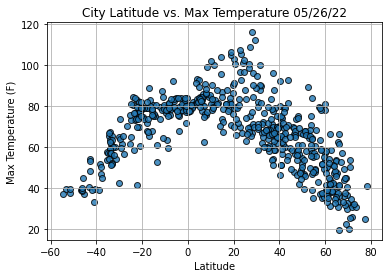

In [71]:
#Import time module.
import time
#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker='o', alpha=.8, label='Cities')
#Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
#Save the figure.
plt.savefig('weather_data/Fig1.png')
#Show plot.
plt.show()

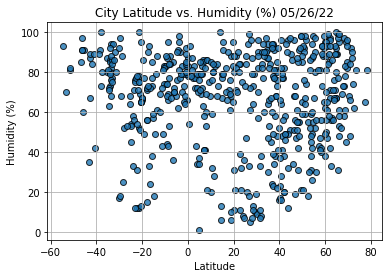

In [72]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor='black', linewidths=1, marker='o', alpha=.8, label='Cities')
#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity (%) '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
#Save the figure.
plt.savefig('weather_data/Fig2.png')
#Show plot.
plt.show()

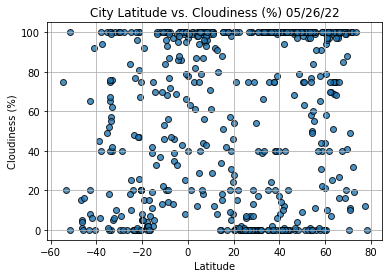

In [73]:
#Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=.8, label='Cities')
#Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
#Save the figure.
plt.savefig('weather_data/Fig3.png')
#Show plot.
plt.show()

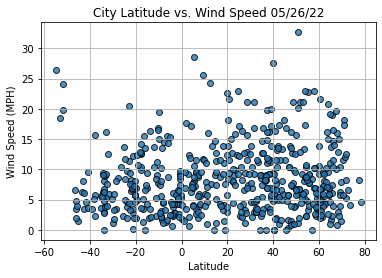

In [74]:
#Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor='black', linewidths=1, marker='o', alpha=.8, label='Cities')
#Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.grid(True)
#Save the figure.
plt.savefig('weather_data/Fig4.png')
#Show plot.
plt.show()

In [75]:
#Import linregress
from scipy.stats import linregress

#Create a function to creat perform linear regression on the weather data
#and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values,title,y_label, text_coordinates):
    # Run regressio on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel('y_label')
    plt.show()

In [76]:
index13 = city_data_df.loc[13]
index13

City                       Barrow
Country                        US
Date          2022-05-26 12:55:01
Lat                       71.2906
Lng                     -156.7887
Max Temp                    34.57
Humidity                       92
Cloudiness                    100
Wind Speed                  12.01
Name: 13, dtype: object

In [77]:
city_data_df['Lat'] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
556     True
557     True
558    False
559    False
560     True
Name: Lat, Length: 561, dtype: bool

In [78]:
city_data_df.loc[(city_data_df['Lat'] >=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Sur,OM,2022-05-26 12:58:34,22.5667,59.5289,96.35,39,0,7.96
3,Abu Dhabi,AE,2022-05-26 12:57:05,24.4667,54.3667,96.82,36,0,23.02
4,Ponta Do Sol,PT,2022-05-26 12:58:35,32.6667,-17.1000,72.01,77,66,3.67
6,Cabo San Lucas,MX,2022-05-26 12:55:00,22.8909,-109.9124,69.51,84,0,9.08
7,Albany,US,2022-05-26 12:56:04,42.6001,-73.9662,60.17,58,100,1.01


In [79]:
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] <=0)]

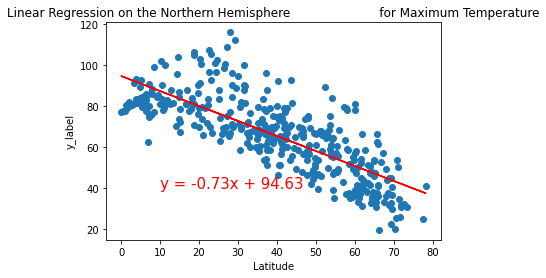

In [82]:
#Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
#Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature', 'Max Temp',(10,40))

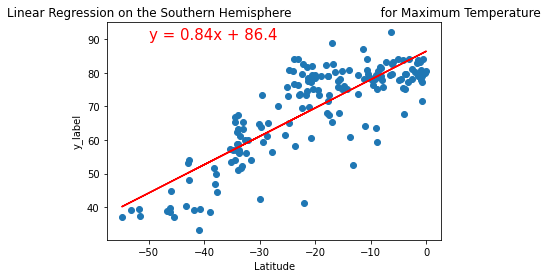

In [86]:
#Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
#Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature', 'Max Temp',(-50,90))

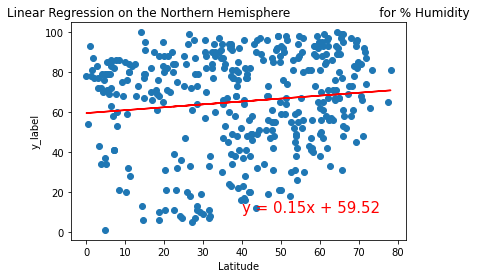

In [87]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
#Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Humidity', '% Humidity',(40,10))

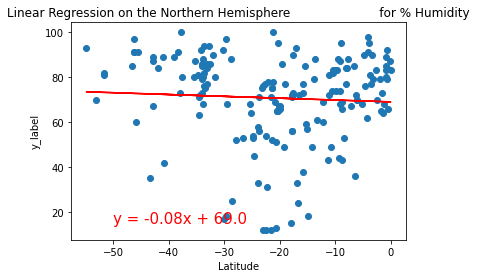

In [88]:
#Linear regression on the Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
#Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Humidity', '% Humidity',(-50,15))

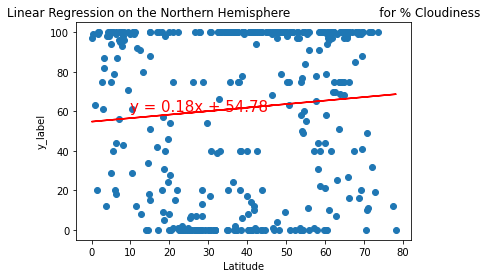

In [91]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
#Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Cloudiness', '% Cloudiness',(10,60))

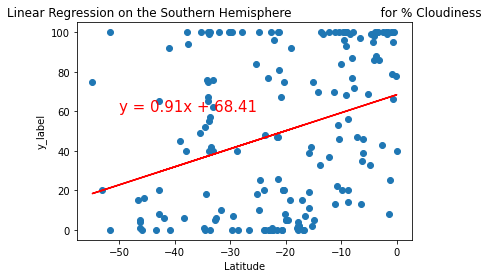

In [92]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
#Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % Cloudiness', '% Cloudiness',(-50,60))

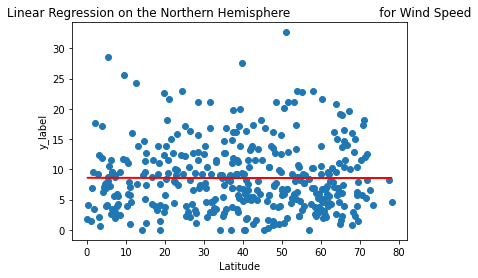

In [96]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
#Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Wind Speed', 'Wind Speed',(50,35))

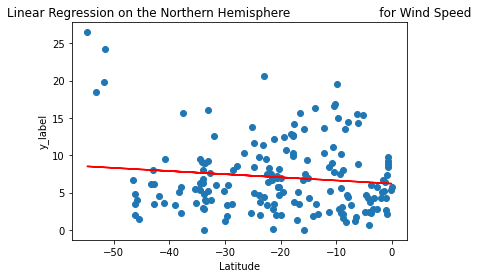

In [97]:
#Linear regression on the Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
#Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Wind Speed', 'Wind Speed',(-60,35))